In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
%matplotlib inline
import math

In [2]:
qasm_Simulator = Aer.get_backend('qasm_simulator')
statevector_Simulator = Aer.get_backend('statevector_simulator')

In [3]:
def run_On_Simulators(circuit):
    state_Vec = execute(circuit, backend=statevector_Simulator).result().get_statevector()
    # This can be done in this way too:
    # state_Vec_Job = execute(circuit, backend=statevector_Simulator)
    # result = state_Vec_Job.result()
    # state_Vec = result.get_statevector()
    num_Qubits = circuit.num_qubits
    circuit.measure([i for i in range(num_Qubits)], [i for i in range(num_Qubits)])
    counts = execute(circuit, backend=qasm_Simulator, shots=1024).result().get_counts()
    return state_Vec, counts


In [4]:
circuit = QuantumCircuit(2, 2)
state_Vec, counts = run_On_Simulators(circuit)

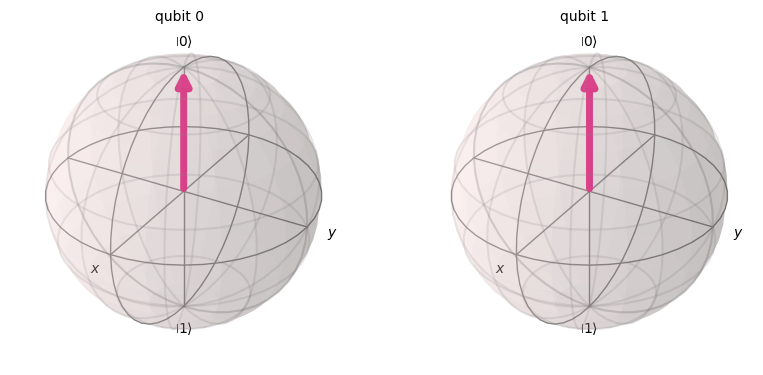

In [5]:
plot_bloch_multivector(state_Vec)

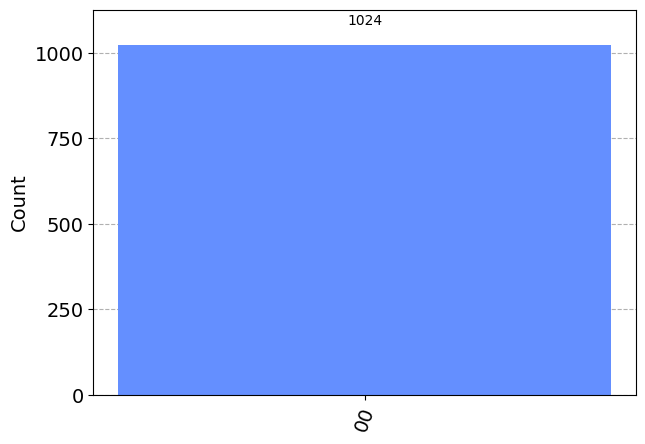

In [6]:
plot_histogram(counts)

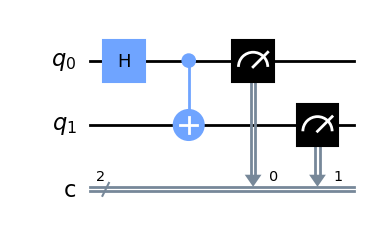

In [7]:
circuit_2 = QuantumCircuit(2, 2)
circuit_2.h(0)
circuit_2.cnot(0, 1)
circuit_2.measure([0, 1], [0, 1])
circuit_2.draw(output='mpl')

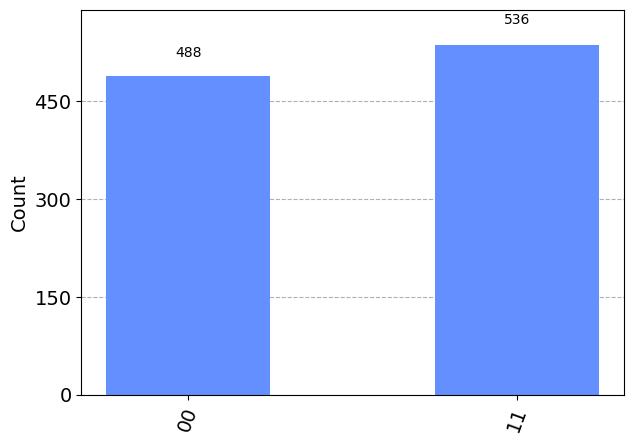

In [8]:
circuit_3 = QuantumCircuit(2, 2)
circuit_3.h(0)
circuit_3.cnot(0, 1)
state_Vec, counts = run_On_Simulators(circuit=circuit_3)
plot_histogram(counts)

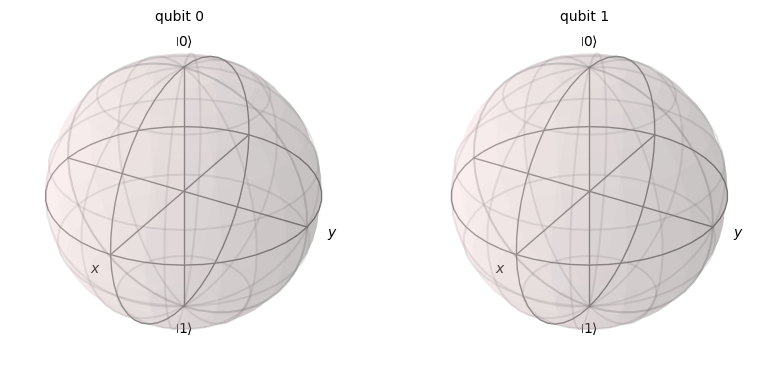

In [9]:
plot_bloch_multivector(state_Vec)

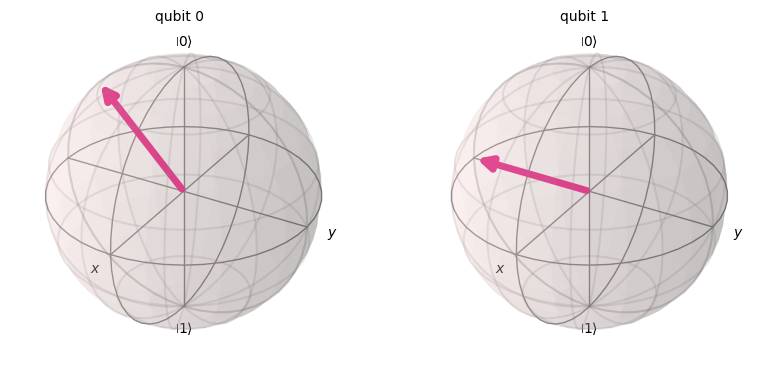

In [10]:
circuit = QuantumCircuit(2, 2)
circuit.rx(theta=math.pi/4, qubit=0)
circuit.rx(theta=math.pi/2, qubit=1)
state_Vec, counts = run_On_Simulators(circuit=circuit)
plot_bloch_multivector(state_Vec)

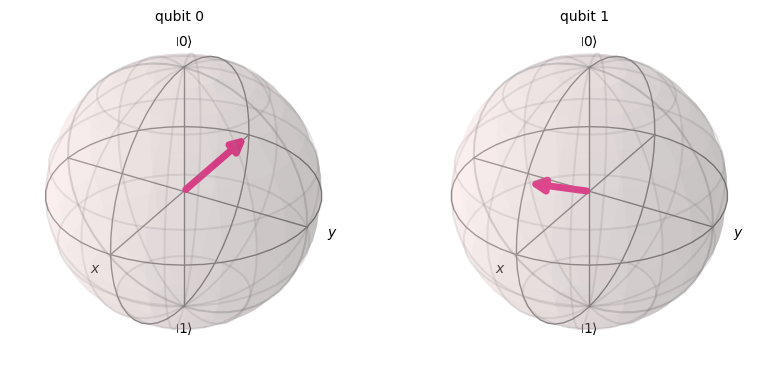

In [11]:
circuit = QuantumCircuit(2, 2)
circuit.ry(theta=(3 * math.pi)/2, qubit=0)
circuit.ry(theta=math.pi/3, qubit=1)
state_Vec, counts = run_On_Simulators(circuit=circuit)
plot_bloch_multivector(state_Vec)

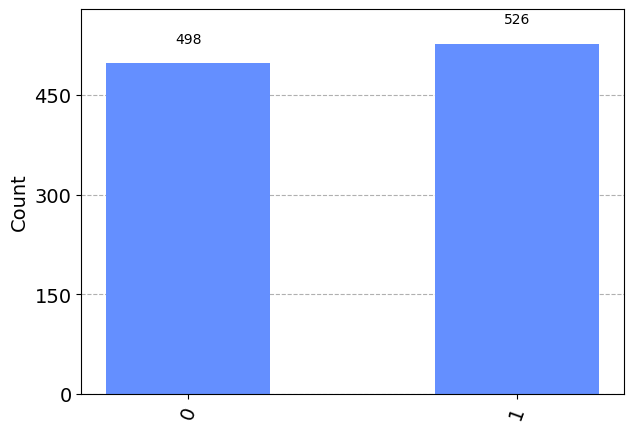

In [12]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
state_Vec, counts = run_On_Simulators(circuit=circuit)
plot_histogram(counts)

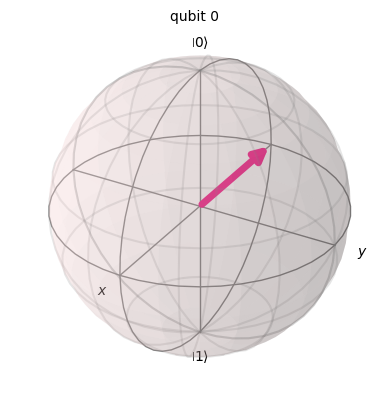

In [14]:
circuit = QuantumCircuit(1, 1)
circuit.h(qubit=0)
circuit.z(0)
state_Vec, counts = run_On_Simulators(circuit=circuit)
plot_bloch_multivector(state_Vec)

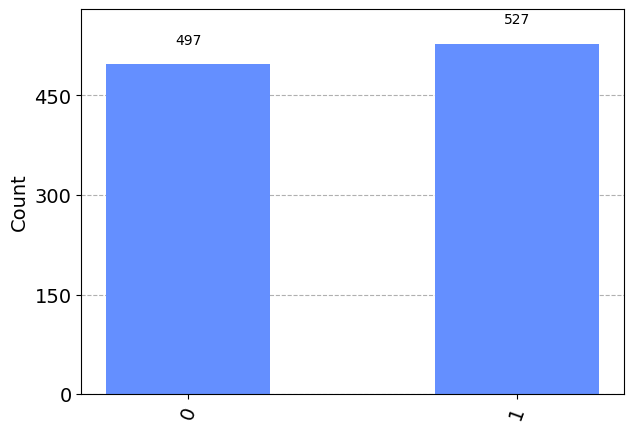

In [15]:
plot_histogram(counts)